In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import scipy.stats as stats
import psycopg2 as pg
import pandas.io.sql as psql
from sqlalchemy import create_engine
# from keys import password

<AxesSubplot:title={'center':'salary'}, xlabel='title'>

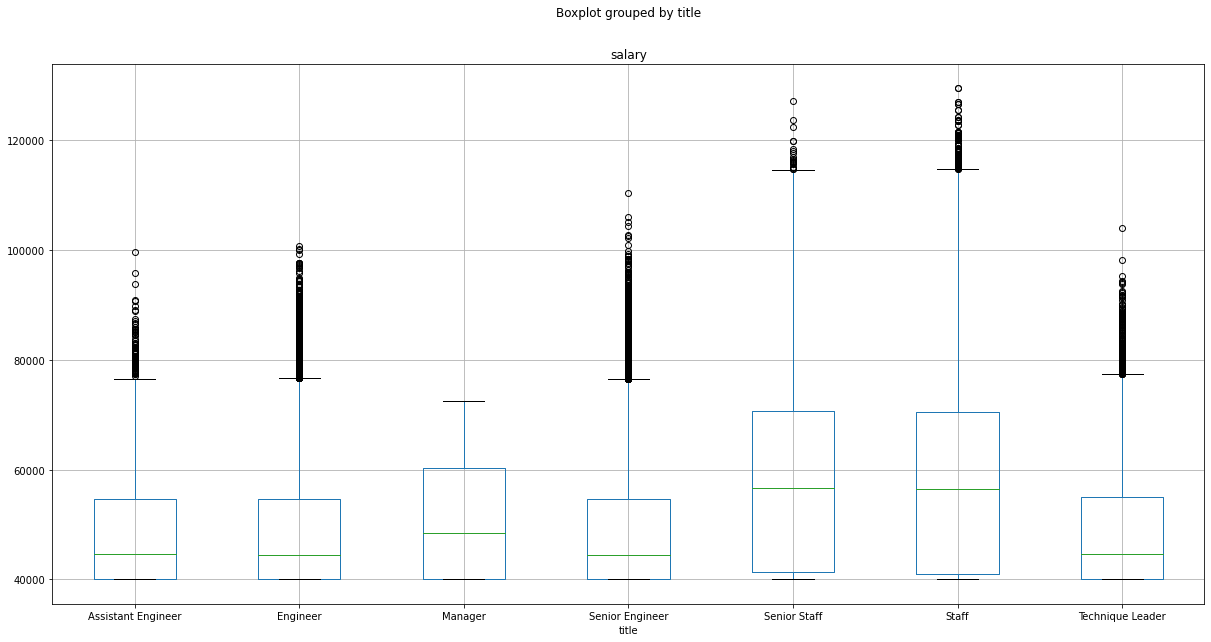

In [24]:
# Connect to sql database
# Add config file to hide password
# conn = pg.connect("dbname=Homework-9 user=postgres password=" + password)

# Make query
salaries_titles = psql.read_sql("SELECT salary.salary, title.title FROM salary INNER JOIN employee ON employee.emp_no = salary.emp_no INNER JOIN title ON title.title_id = employee.emp_title_id", conn)
df = pd.DataFrame(salaries_titles)

# Format data for boxplot
staff = df[df['title'] == "Staff"]
engineer = df[df['title'] == "Engineer"]
senior_engineer = df[df['title'] == "Senior Engineer"]
senior_staff = df[df['title'] == "Senior Staff"]
assistant_engineer = df[df['title'] == "Assistant Engineer"]
manager = df[df['title'] == "Manager"]
technique_leader = df[df['title'] == 'Technique Leader']

overview = pd.concat([staff, engineer, senior_engineer, assistant_engineer, staff, senior_staff, manager, technique_leader], axis=0)
# Display box plot
overview.boxplot("salary", by="title", figsize=(20, 10))


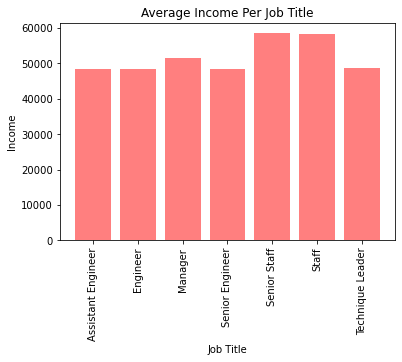

In [25]:
# 3. Create a bar chart of average salary by title.
salaries_titles = psql.read_sql("SELECT salary.salary, title.title FROM salary INNER JOIN employee ON employee.emp_no = salary.emp_no INNER JOIN title ON title.title_id = employee.emp_title_id", conn)
sorted_salaries = salaries_titles.groupby(by=["title"])["salary"].mean()

# Salary Comparison by Title
x_axis= np.arange(len(sorted_salaries))
tick_locations = [value+0.4 for value in x_axis]
plt.bar(x_axis, sorted_salaries, color='r', alpha=0.5, align="edge")
plt.xticks(tick_locations, sorted_salaries.index, rotation="vertical")
plt.title("Average Income Per Job Title")
plt.xlabel("Job Title")
plt.ylabel("Income")
plt.show()
